In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats
import pandas_profiling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

### Datasets

In [3]:
tel = pd.read_csv('C:/Users/Nithin/Downloads/Segementation_Scientific/telco_csv.csv')
tel_test = pd.read_csv('C:/Users/Nithin/Downloads/Segementation_Scientific/Telco_new_cust.csv')

### Data Prep

In [4]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

**-- Outlier**

<AxesSubplot:>

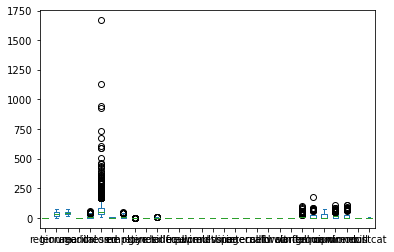

In [5]:
tel.plot(kind='box')

In [6]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [7]:
tel = tel.apply(lambda x : outlier_capping(x))

<AxesSubplot:>

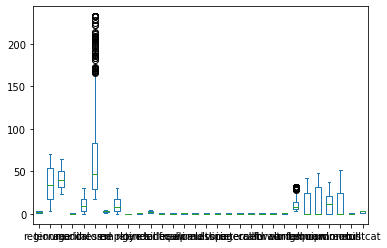

In [8]:
tel.plot(kind='box')

**-- Categorical Variables**

In [9]:
tel = pd.get_dummies(tel,columns=['region'],drop_first=True,prefix = 'region').copy()

In [10]:
tel = pd.get_dummies(tel,columns=['custcat'],drop_first=True,prefix = 'custcat').copy()

### Standardisation of train & test data

In [11]:
sc = StandardScaler()

sc_model = sc.fit(tel)

In [12]:
tel_t = sc_model.transform(tel)
tel_t = pd.DataFrame(tel_t)
tel_t.columns = tel.columns
tel_t

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
0,-1.067035,0.204383,1.010051,-0.240465,-0.077966,1.087753,-0.610180,0.0,-1.034598,-0.216777,...,-0.862146,-0.758759,-0.468486,-0.613585,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,-0.555788
1,-1.161799,-0.714754,1.010051,-0.457883,1.182514,1.906227,-0.610180,0.0,-1.034598,2.041317,...,0.565504,-0.758759,0.187642,1.396503,-0.768001,-0.708168,1.380933,-0.526440,-0.625156,1.799247
2,1.538957,0.872846,1.010051,1.390172,0.832380,-1.367671,1.964420,0.0,0.966559,-0.216777,...,0.376298,-0.758759,1.457567,-0.613585,-0.768001,-0.708168,1.380933,-0.526440,1.599600,-0.555788
3,-0.119402,-0.714754,-0.990050,0.085663,-0.620672,-0.549196,-1.146555,0.0,0.966559,-0.969475,...,-0.862146,-0.758759,-1.103448,-0.613585,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,-0.555788
4,-0.593219,-0.965428,1.010051,-0.240465,-0.673192,-1.367671,-0.932005,0.0,-1.034598,1.288619,...,-0.862146,-0.758759,-1.103448,-0.613585,-0.768001,1.412095,-0.724148,-0.526440,1.599600,-0.555788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.209180,-0.213407,-0.990050,-1.218846,-0.725712,0.269278,-1.146555,0.0,0.966559,0.535921,...,-0.862146,0.831305,-1.103448,-0.613585,1.302082,-0.708168,1.380933,-0.526440,-0.625156,-0.555788
996,-1.351326,-0.631196,-0.990050,-1.001428,-0.813246,1.906227,-0.610180,0.0,0.966559,-0.969475,...,-0.862146,0.642468,-1.103448,-0.613585,-0.768001,-0.708168,-0.724148,-0.526440,-0.625156,-0.555788
997,1.491575,1.457751,-0.990050,2.151136,2.867530,1.906227,2.178970,0.0,0.966559,-0.969475,...,1.339532,1.904394,1.923206,2.277817,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
998,1.633720,0.622172,-0.990050,0.737917,0.324687,-0.549196,1.213495,0.0,0.966559,-0.969475,...,1.442735,-0.758759,1.034258,-0.613585,-0.768001,-0.708168,1.380933,-0.526440,1.599600,-0.555788


### Feature Extraction

**--Principal Component Analysis**

In [13]:
#n = no. of columns
pc = PCA(n_components=33)
pc.fit(tel_t)

PCA(n_components=33)

In [14]:
pc.explained_variance_

array([7.42475269e+00, 5.33753406e+00, 3.39997357e+00, 1.83772059e+00,
       1.53648074e+00, 1.24745674e+00, 1.15258899e+00, 1.01102434e+00,
       8.89722702e-01, 8.17057049e-01, 6.81870278e-01, 6.52652499e-01,
       6.10114140e-01, 5.41682497e-01, 4.97181476e-01, 4.67004336e-01,
       4.52636687e-01, 4.26246504e-01, 4.08691978e-01, 3.74623251e-01,
       3.55731555e-01, 3.32342728e-01, 2.98309619e-01, 2.41315198e-01,
       2.33369387e-01, 2.21408136e-01, 1.94315466e-01, 1.73885399e-01,
       8.52586902e-02, 6.37925917e-02, 4.25545455e-02, 2.27336049e-02,
       1.46427428e-30])

In [15]:
eig = pd.Series(np.round(pc.explained_variance_,decimals=2),name='eigen_val')

In [16]:
#Near no of features
sum(pc.explained_variance_)

32.032032032032035

In [17]:
col_name = pd.Series(['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','PC_11','PC_12','PC_13','PC_14','PC_15','PC_16','PC_17','PC_18','PC_19','PC_20','PC_21','PC_22','PC_23','PC_24','PC_25','PC_26','PC_27','PC_28','PC_29','PC_30','PC_31','PC_32',
],name='principal_comp')

In [18]:
var = pd.Series(np.cumsum(np.round(pc.explained_variance_ratio_,decimals = 4)*100),name='Exp_var_in_pct')
pd.concat([col_name,var,eig],axis=1)

,principal_comp,Exp_var_in_pct,eigen_val
0,PC_1,23.18,7.42
1,PC_2,39.84,5.34
2,PC_3,50.45,3.40
3,PC_4,56.19,1.84
4,PC_5,60.99,1.54
5,PC_6,64.88,1.25
6,PC_7,68.48,1.15
7,PC_8,71.64,1.01
8,PC_9,74.42,0.89
9,PC_10,76.97,0.82


In [19]:
# Considering 75 % info available upto PC10 & PC values should be greater than 0.8
pc_f = PCA(n_components=10).fit(tel_t)
pc_f.explained_variance_

array([7.42475269, 5.33753406, 3.39997357, 1.83771996, 1.53647852,
       1.24742806, 1.15255961, 1.01096926, 0.88959076, 0.81668157])

In [20]:
# Output in Factors
eig_vect = pd.DataFrame(np.round(pc_f.transform(tel_t),decimals=2))
eig_vect.columns = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10']
eig_vect

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-2.28,-0.03,-0.97,0.24,1.56,0.65,-0.75,1.02,-0.48,0.96
1,3.55,-0.66,-2.28,1.46,-1.12,2.29,-0.73,0.66,1.51,1.95
2,0.47,4.65,0.48,0.22,-1.52,0.79,0.50,-0.55,-1.21,-0.37
3,-3.54,-0.34,-0.96,-1.11,1.51,0.10,-0.99,-1.30,0.47,-0.80
4,-1.99,0.79,-2.97,1.40,1.67,0.25,0.67,1.02,-0.06,-0.95
...,...,...,...,...,...,...,...,...,...,...
995,-2.91,-2.87,-1.09,-0.84,-1.44,0.52,0.34,-0.52,-0.93,-0.51
996,-2.97,-2.46,-1.04,-1.49,-0.02,-0.08,0.47,-0.76,-0.57,0.29
997,6.55,0.30,4.08,-2.27,-1.42,1.08,0.60,-0.61,-0.43,0.39
998,1.70,4.29,-0.13,-0.96,-1.83,-0.75,0.16,-0.94,-0.32,-0.18


##### --Factor Loading Matrix

In [21]:
loading = pd.DataFrame((pc_f.components_.T * np.sqrt(pc_f.explained_variance_)),columns = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10']).T
loading.columns = tel_t.columns
loading = loading.T

In [22]:
loading.to_excel('C:/Users/Nithin/Downloads/Segementation_Scientific/factor_loading.xlsx')

In [23]:
final_cols = ['wiremon', 'custcat_4', 'employ', 'ed', 'equip', 'tenure', 'longmon',
              'reside', 'region_2', 'income', 'retire', 'gender']

In [24]:
input_seg = tel[final_cols]

### Segementation Model

In [25]:
km = KMeans(n_clusters=4,random_state=1234)

In [26]:
km = km.fit(input_seg)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [27]:
pd.Series(km.labels_).value_counts().sort_index()

0    440
1     99
2    188
3    273
dtype: int64

### Model Evaluation

**-- Silhoute Score**

In [28]:
silhouette_score(input_seg,km.labels_)

0.3341106653676371

In [29]:
#Loop of k = 2 to 20
k_range = range(2,21)
silhouette_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(input_seg)
    silhouette_scores.append(silhouette_score(input_seg, km.labels_))

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

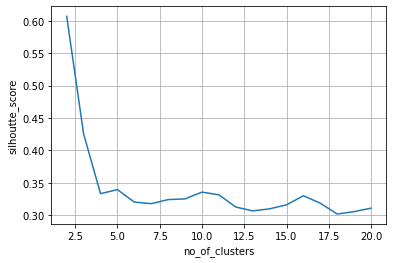

In [30]:
plt.plot(k_range,silhouette_scores)
plt.xlabel('no_of_clusters')
plt.ylabel('silhoutte_score')
plt.grid(True)

**Silhouette Score = 4 to 10**

**-- Pseudo F Value (WCSS Score)**

In [31]:
k_range = range(2,21)
wcss_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1234)
    km.fit(input_seg)
    wcss_scores.append(km.inertia_)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

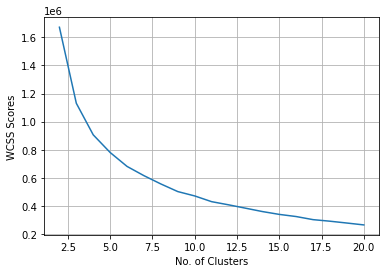

In [32]:
plt.plot(k_range,wcss_scores)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Scores')
plt.grid(True)

**WCSS Score = 5 to 11**

**-- Manual Profiling**

In [33]:
# We have decided k value between 3 to 8

km_3 = KMeans(n_clusters=3, random_state=123).fit(input_seg)
km_4 = KMeans(n_clusters=4, random_state=123).fit(input_seg)
km_5 = KMeans(n_clusters=5, random_state=123).fit(input_seg)
km_6 = KMeans(n_clusters=6, random_state=123).fit(input_seg)
km_7 = KMeans(n_clusters=7, random_state=123).fit(input_seg)
km_8 = KMeans(n_clusters=8, random_state=123).fit(input_seg)

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [34]:
pd.Series(km_3.labels_).value_counts().sort_index()

0    654
1    108
2    238
dtype: int64

In [35]:
pd.Series(km_4.labels_).value_counts().sort_index()

0    437
1    276
2     99
3    188
dtype: int64

In [36]:
pd.Series(km_5.labels_).value_counts().sort_index()

0     99
1    144
2    179
3    216
4    362
dtype: int64

In [37]:
pd.Series(km_6.labels_).value_counts().sort_index()

0    136
1     82
2    138
3    341
4    101
5    202
dtype: int64

In [38]:
pd.Series(km_7.labels_).value_counts().sort_index()

0    169
1     82
2    135
3    282
4    102
5    105
6    125
dtype: int64

In [39]:
pd.Series(km_8.labels_).value_counts().sort_index()

0    106
1    143
2     81
3    240
4     63
5    157
6    136
7     74
dtype: int64

In [40]:
tel_new = tel.copy()

In [41]:
tel_new['K_3'] = km_3.labels_
tel_new['K_4'] = km_4.labels_
tel_new['K_5'] = km_5.labels_
tel_new['K_6'] = km_6.labels_
tel_new['K_7'] = km_7.labels_
tel_new['K_8'] = km_8.labels_

In [42]:
tel_new.apply(lambda x : x.mean()).T

tenure       35.520000
age          41.554000
marital       0.495000
address      11.212000
income       68.453500
ed            2.671000
employ       10.688000
retire        0.000000
gender        0.517000
reside        2.288000
tollfree      0.474000
equip         0.386000
callcard      0.678000
wireless      0.296000
multline      0.475000
voice         0.304000
pager         0.261000
internet      0.368000
callid        0.481000
callwait      0.485000
forward       0.493000
confer        0.502000
longmon      11.107775
tollmon      12.530750
equipmon     13.862300
cardmon      13.033625
wiremon      10.897525
ebill         0.371000
region_2      0.334000
region_3      0.344000
custcat_2     0.217000
custcat_3     0.281000
custcat_4     0.236000
K_3           0.584000
K_4           1.038000
K_5           2.598000
K_6           2.795000
K_7           2.881000
K_8           3.396000
dtype: float64

In [43]:
tel_new.groupby('K_3').apply(lambda x : x.mean()).T

K_3,0,1,2
tenure,29.388379,49.842593,45.869748
age,38.010703,52.916667,46.134454
marital,0.487768,0.490741,0.516807
address,9.279817,16.212963,14.252101
income,36.045872,206.773148,94.739496
ed,2.596330,2.907407,2.768908
employ,6.545872,24.231481,15.924370
retire,0.000000,0.000000,0.000000
gender,0.504587,0.527778,0.546218
reside,2.356269,1.925926,2.264706


In [44]:
prof_out = pd.concat([tel_new.apply(lambda x : x.mean()).T,
           tel_new.groupby('K_3').apply(lambda x : x.mean()).T,
           tel_new.groupby('K_4').apply(lambda x : x.mean()).T,
           tel_new.groupby('K_5').apply(lambda x : x.mean()).T,
           tel_new.groupby('K_6').apply(lambda x : x.mean()).T,
           tel_new.groupby('K_7').apply(lambda x : x.mean()).T,
           tel_new.groupby('K_8').apply(lambda x : x.mean()).T],axis=1)

In [45]:
prof_out.columns = ['Overall','K_3_1','K_3_2','K_3_3','K_4_1','K_4_2','K_4_3','K_4_4','K_5_1','K_5_2','K_5_3','K_5_4','K_5_5','K_6_1','K_6_2','K_6_3','K_6_4','K_6_5','K_6_6','K_7_1','K_7_2','K_7_3','K_7_4','K_7_5','K_7_6','K_7_7','K_8_1','K_8_2','K_8_3','K_8_4','K_8_5','K_8_6','K_8_7','K_8_8',
]
prof_out

,Overall,K_3_1,K_3_2,K_3_3,K_4_1,K_4_2,K_4_3,K_4_4,K_5_1,K_5_2,...,K_7_6,K_7_7,K_8_1,K_8_2,K_8_3,K_8_4,K_8_5,K_8_6,K_8_7,K_8_8
tenure,35.520000,29.388379,49.842593,45.869748,17.757437,53.565217,49.505051,42.952128,49.505051,39.083333,...,58.590476,42.32000,56.056604,20.307692,48.049383,15.991667,46.761905,53.738854,34.073529,39.554054
age,41.554000,38.010703,52.916667,46.134454,35.228833,44.181159,53.000000,46.372340,53.000000,40.513889,...,49.038095,40.78400,47.896226,39.482517,53.234568,33.787500,44.174603,43.783439,37.801471,48.810811
marital,0.495000,0.487768,0.490741,0.516807,0.441648,0.590580,0.484848,0.484043,0.484848,0.548611,...,0.571429,0.58400,0.584906,0.426573,0.481481,0.450000,0.523810,0.541401,0.544118,0.445946
address,11.212000,9.279817,16.212963,14.252101,7.187643,13.528986,16.434343,14.414894,16.434343,10.319444,...,18.200000,10.24000,17.066038,8.643357,15.851852,6.212500,12.555556,14.509554,8.933824,14.972973
income,68.453500,36.045872,206.773148,94.739496,35.084668,44.278986,211.580808,106.138298,211.580808,47.000000,...,83.219048,48.84000,84.707547,56.874126,221.290123,26.883333,91.158730,35.171975,37.852941,142.594595
ed,2.671000,2.596330,2.907407,2.768908,2.654462,2.525362,2.858586,2.824468,2.858586,3.291667,...,2.171429,3.34400,2.264151,2.867133,2.925926,2.362500,3.333333,2.210191,3.250000,2.945946
employ,10.688000,6.545872,24.231481,15.924370,4.913043,11.144928,24.575758,16.127660,24.575758,8.381944,...,18.990476,8.49600,18.377358,9.062937,24.333333,3.604167,13.412698,9.624204,6.154412,19.121622
retire,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gender,0.517000,0.504587,0.527778,0.546218,0.503432,0.496377,0.545455,0.563830,0.545455,0.520833,...,0.552381,0.55200,0.537736,0.482517,0.555556,0.516667,0.539683,0.471338,0.544118,0.540541
reside,2.288000,2.356269,1.925926,2.264706,2.304348,2.463768,1.949495,2.170213,1.949495,2.493056,...,2.238095,2.60800,2.320755,2.020979,1.925926,2.412500,2.238095,2.305732,2.632353,2.121622


In [46]:
prof_out = prof_out.iloc[0:33,:]
prof_out

,Overall,K_3_1,K_3_2,K_3_3,K_4_1,K_4_2,K_4_3,K_4_4,K_5_1,K_5_2,...,K_7_6,K_7_7,K_8_1,K_8_2,K_8_3,K_8_4,K_8_5,K_8_6,K_8_7,K_8_8
tenure,35.520000,29.388379,49.842593,45.869748,17.757437,53.565217,49.505051,42.952128,49.505051,39.083333,...,58.590476,42.32000,56.056604,20.307692,48.049383,15.991667,46.761905,53.738854,34.073529,39.554054
age,41.554000,38.010703,52.916667,46.134454,35.228833,44.181159,53.000000,46.372340,53.000000,40.513889,...,49.038095,40.78400,47.896226,39.482517,53.234568,33.787500,44.174603,43.783439,37.801471,48.810811
marital,0.495000,0.487768,0.490741,0.516807,0.441648,0.590580,0.484848,0.484043,0.484848,0.548611,...,0.571429,0.58400,0.584906,0.426573,0.481481,0.450000,0.523810,0.541401,0.544118,0.445946
address,11.212000,9.279817,16.212963,14.252101,7.187643,13.528986,16.434343,14.414894,16.434343,10.319444,...,18.200000,10.24000,17.066038,8.643357,15.851852,6.212500,12.555556,14.509554,8.933824,14.972973
income,68.453500,36.045872,206.773148,94.739496,35.084668,44.278986,211.580808,106.138298,211.580808,47.000000,...,83.219048,48.84000,84.707547,56.874126,221.290123,26.883333,91.158730,35.171975,37.852941,142.594595
ed,2.671000,2.596330,2.907407,2.768908,2.654462,2.525362,2.858586,2.824468,2.858586,3.291667,...,2.171429,3.34400,2.264151,2.867133,2.925926,2.362500,3.333333,2.210191,3.250000,2.945946
employ,10.688000,6.545872,24.231481,15.924370,4.913043,11.144928,24.575758,16.127660,24.575758,8.381944,...,18.990476,8.49600,18.377358,9.062937,24.333333,3.604167,13.412698,9.624204,6.154412,19.121622
retire,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gender,0.517000,0.504587,0.527778,0.546218,0.503432,0.496377,0.545455,0.563830,0.545455,0.520833,...,0.552381,0.55200,0.537736,0.482517,0.555556,0.516667,0.539683,0.471338,0.544118,0.540541
reside,2.288000,2.356269,1.925926,2.264706,2.304348,2.463768,1.949495,2.170213,1.949495,2.493056,...,2.238095,2.60800,2.320755,2.020979,1.925926,2.412500,2.238095,2.305732,2.632353,2.121622


In [47]:
tel_new.K_3.value_counts()

0    654
2    238
1    108
Name: K_3, dtype: int64

In [48]:
len(tel_new)

1000

In [49]:
seg_size = pd.concat([pd.Series(len(tel_new)),
           pd.Series(tel_new.K_3.value_counts()),
           pd.Series(tel_new.K_4.value_counts()),
           pd.Series(tel_new.K_5.value_counts()),
           pd.Series(tel_new.K_6.value_counts()),
           pd.Series(tel_new.K_7.value_counts()),
           pd.Series(tel_new.K_8.value_counts())])

In [50]:
seg_size = seg_size.reset_index(drop=True)
seg_size = pd.DataFrame(seg_size,columns=['Size'])

In [51]:
seg_size_prop = round(seg_size/len(seg_size),2).T
seg_size_prop

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Size,29.41,19.24,7.0,3.18,12.85,8.12,5.53,2.91,10.65,6.35,...,3.0,2.41,7.06,4.62,4.21,4.0,3.12,2.38,2.18,1.85


In [52]:
size = pd.concat([seg_size.T,seg_size_prop],axis=0)
size = size.reset_index(drop=True)
size.columns = ['Overall','K_3_1','K_3_2','K_3_3','K_4_1','K_4_2','K_4_3','K_4_4','K_5_1','K_5_2','K_5_3','K_5_4','K_5_5','K_6_1','K_6_2','K_6_3','K_6_4','K_6_5','K_6_6','K_7_1','K_7_2','K_7_3','K_7_4','K_7_5','K_7_6','K_7_7','K_8_1','K_8_2','K_8_3','K_8_4','K_8_5','K_8_6','K_8_7','K_8_8']
size.index = ['no_of_obs','prop_of_obs']
size

,Overall,K_3_1,K_3_2,K_3_3,K_4_1,K_4_2,K_4_3,K_4_4,K_5_1,K_5_2,...,K_7_6,K_7_7,K_8_1,K_8_2,K_8_3,K_8_4,K_8_5,K_8_6,K_8_7,K_8_8
no_of_obs,1000.00,654.00,238.0,108.00,437.00,276.00,188.00,99.00,362.00,216.00,...,102.0,82.00,240.00,157.00,143.00,136.0,106.00,81.00,74.00,63.00
prop_of_obs,29.41,19.24,7.0,3.18,12.85,8.12,5.53,2.91,10.65,6.35,...,3.0,2.41,7.06,4.62,4.21,4.0,3.12,2.38,2.18,1.85


In [53]:
km_analysis = pd.concat([size,prof_out],axis=0)

In [54]:
km_analysis.to_excel('C:/Users/Nithin/Downloads/Segementation_Scientific/km_analysis.xlsx')